# Visualización de Datos

## Distribuciones

En este tutorial aprenderemos todo sobre **histogramas** y **diagramas de densidad**.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Seleccionar un conjunto de datos

Trabajaremos con un conjunto de datos de 150 flores diferentes, o 50 de cada una de tres especies diferentes de iris (*Iris setosa, Iris versicolor e Iris virginica*).

![tut4_iris](https://i.imgur.com/RcxYYBA.png)

### Cargar y examinar los datos

Cada fila del conjunto de datos corresponde a una flor diferente. Hay cuatro medidas: la longitud y el ancho del sépalo, junto con la longitud y el ancho del pétalo. También hacemos un seguimiento de las especies correspondientes.

In [2]:
# Ruta del archivo a ller
iris_filepath = "./input/iris.csv"

# Lee el archivo en la variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Muestra las primeras 5 filas de los datos
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Histogramas

Digamos que nos gustaría crear un histograma para ver cómo varía la longitud de los pétalos en las flores de iris. Podemos hacer esto con el comando `sns.distplot`.

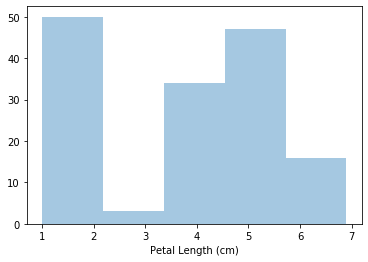

In [5]:
# Histograma 
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False);

Personalizamos el comportamiento del comando con dos datos adicionales:

+ `a` = elige la columna que nos gustaría dibujar (en este caso, elegimos `Petal Length (cm)`).
+ `kde = False` es algo que siempre proporcionaremos al crear un histograma, ya que dejarlo fuera creará un gráfico ligeramente diferente.

### Gráficos de densidad

El siguiente tipo de gráfico es un gráfico de **estimación de densidad de kernel** (KDE). En caso de que no estés familiarizado con los gráficos de KDE, puedes considerarlo como un histograma suavizado.

Para hacer un diagrama de KDE, usamos el comando `sns.kdeplot`. Establecer `shade = True` colorea el área debajo de la curva (y `data=` tiene una funcionalidad idéntica a la que teníamos cuando hicimos el histograma anterior).

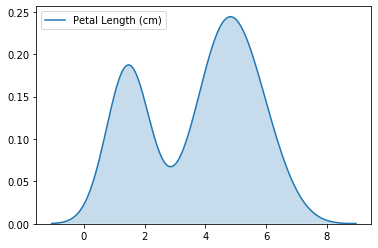

In [7]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True);

### Gráficos 2D KDE

No estamos restringidos a una sola columna cuando creamos un diagrama de KDE. Podemos crear un diagrama KDE **bidimensional (2D)** con el comando `sns.jointplot`.

En la siguiente gráfica, la codificación de colores nos muestra la probabilidad de que veamos diferentes combinaciones de ancho de sépalo y longitud de pétalo, donde las partes más oscuras de la figura son más probables.

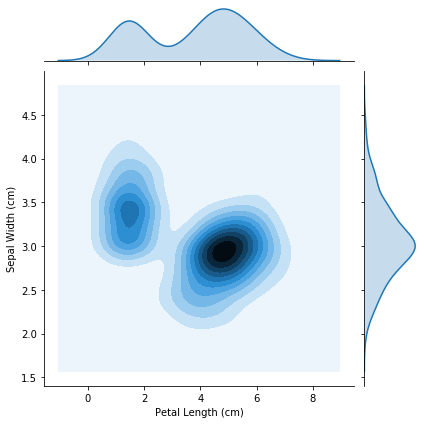

In [9]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde");

Tenga en cuenta que, además del diagrama 2D KDE en el centro,

+ la curva en la parte superior de la figura es un gráfico KDE para los datos en el eje x (en este caso, `iris_data['Petal Length (cm)]`) y
+ la curva a la derecha de la figura es un diagrama de KDE para los datos en el eje y (en este caso, `iris_data['Sepal Width (cm)']`).

### Gráficos codificadas por colores

Para la siguiente parte del tutorial, crearemos diagramas para comprender las diferencias entre las especies. Para lograr esto, comenzamos dividiendo el conjunto de datos en tres archivos separados, uno para cada especie.

In [10]:
# Ruta de los archivos a leer
iris_set_filepath = "./input/iris_setosa.csv"
iris_ver_filepath = "./input/iris_versicolor.csv"
iris_vir_filepath = "./input/iris_virginica.csv"

# Lee los archivos en las variables
iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

# Muestra las primeras 5 filas del los datos Iris versicolor
iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


A continuación, creamos un histograma diferente para cada especie mediante el uso del comando `sns.distplot` (como arriba) tres veces. Usamos `label=` para establecer cómo aparecerá cada histograma en la leyenda.

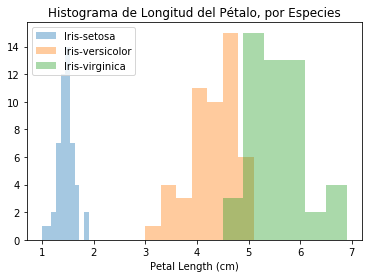

In [12]:
# Histogramas por cada especie
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

# Añade título
plt.title("Histograma de Longitud del Pétalo, por Especies")

# Fuerza que aparezca la leyenda
plt.legend();

En este caso, la leyenda no aparece automáticamente en la gráfica. Para forzar que se muestre (para cualquier tipo de diagrama), siempre podemos usar `plt.legend()`.

También podemos crear un diagrama de KDE para cada especie usando `sns.kdeplot` (como arriba). Nuevamente, `label=` se usa para establecer los valores en la leyenda.

Text(0.5, 1.0, 'Distribución de Longitud del Pétalo, por Especies')

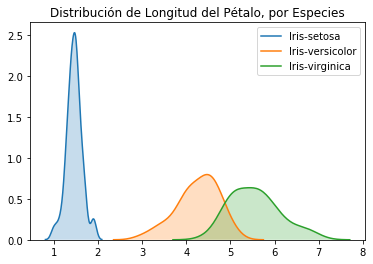

In [14]:
# KDE plots para cada especie
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True)

# Añade título
plt.title("Distribución de Longitud del Pétalo, por Especies")

Un patrón interesante que se puede ver en las gráficas es que las plantas parecen pertenecer a uno de los dos grupos, donde *Iris versicolor* e *Iris virginica* parecen tener valores similares para la longitud de los pétalos, mientras que *Iris setosa* pertenece a una categoría por sí misma.

De hecho, de acuerdo con este conjunto de datos, incluso podríamos clasificar cualquier planta de iris como *Iris setosa* (a diferencia de *Iris versicolor* o *Iris virginica*) simplemente mirando la longitud del pétalo: si la longitud del pétalo de una flor de iris es menor que 2 cm, ¡es muy probable que sea *Iris setosa*!

## Ejercicio

En este ejercicio, utilizaremos estos nuevos conocimientos para proponer una solución a un escenario del mundo real.

### Escenario

Trabajarás con un conjunto de datos del mundo real que contiene información recopilada de imágenes microscópicas de tumores de cáncer de mama, similar a la imagen a continuación.

![ex4_cancer_image](https://i.imgur.com/qUESsJe.png)

Cada tumor ha sido etiquetado como **benigno** (_noncancerous_) o **maligno** (_cancerous_).

Para obtener más información sobre cómo se utiliza este tipo de datos para crear algoritmos inteligentes para clasificar tumores en entornos médicos, **mira el video [en este enlace](https://www.youtube.com/watch?v=9Mz84cwVmS0)**!

### Configuracion

In [15]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Paso 1: Cargar los datos

En este paso, cargaremos dos archivos de datos.

+ Carga el archivo de datos correspondiente a tumores **benignos** en un DataFrame llamado `cancer_b_data`. La ruta de archivo correspondiente es `cancer_b_filepath`. Usa la columna `"Id"` para etiquetar las filas.
+ Carga el archivo de datos correspondiente a los tumores **malignos** en un DataFrame llamado `cancer_m_data`. La ruta de archivo correspondiente es `cancer_m_filepath`. Usa la columna `"Id"` para etiquetar las filas.

In [17]:
# Rutas de los archivos a leer
cancer_b_filepath = "./input/cancer_b.csv"
cancer_m_filepath = "./input/cancer_m.csv"

cancer_b_data = pd.read_csv(cancer_b_filepath, index_col="Id")
cancer_m_data = pd.read_csv(cancer_m_filepath, index_col="Id")

### Paso 2: Revisa los datos

Usa un comando de Python para imprimir las primeras 5 filas de datos para tumores benignos.

In [18]:
cancer_b_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


Usa un comando de Python para imprimir las primeras 5 filas de datos para tumores malignos.

In [20]:
cancer_m_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


En los conjuntos de datos, cada fila corresponde a una imagen diferente. Cada conjunto de datos tiene 31 columnas diferentes, correspondientes a:

- 1 columna (`"Diagnóstico"`) que clasifica los tumores como benignos (que aparecen en el conjunto de datos como **`B`**) o malignos (__`M`__), y
- 30 columnas que contienen diferentes medidas recogidas de las imágenes.

Usa las primeras 5 filas de datos (para tumores benignos y malignos) para responder las siguientes preguntas.

In [21]:
# En las primeras cinco filas de datos para tumores benignos, ¿cuál es el valor más grande para 'Perimeter (mean)'?
max_perim = 87.46

# ¿Cuál es el valor de 'Radius (mean)' para el tumor con Id 842517?
mean_radius = 20.57

### Paso 3: Investigando diferencias

#### Parte A

A continuación crea dos histogramas que muestren la distribución en valores para `"Area (mean)"` para tumores benignos y malignos. (_Para permitir una comparación fácil, cree una sola figura que contenga ambos histogramas en la celda de código a continuación.)

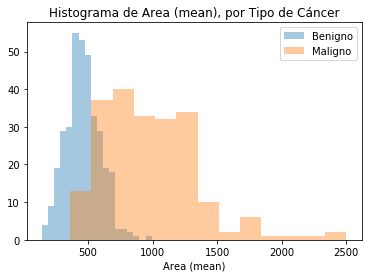

In [23]:
# Histogramas por cada tipo de cáncer
sns.distplot(a=cancer_b_data['Area (mean)'], label="Benigno", kde=False)
sns.distplot(a=cancer_m_data['Area (mean)'], label="Maligno", kde=False)
# Añade título
plt.title("Histograma de Area (mean), por Tipo de Cáncer")

# Fuerza que aparezca la leyenda
plt.legend();

#### Parte B

Un investigador le solicita ayuda para identificar cómo se puede usar la columna `"Area (mean)"` para comprender la diferencia entre los tumores benignos y malignos. Según los histogramas anteriores,

+ ¿Los tumores malignos tienen valores más altos o más bajos para `"Area (mean)"` (en relación con los tumores benignos), en promedio?
- ¿Qué tipo de tumor parece tener un rango mayor de valores potenciales?

**Solución**: los tumores benignos tienen valores más altos para `"Area (mean)"`, en promedio. Los tumores malignos tienen una gama más amplia de valores potenciales.

### Paso 4: Una columna muy útil

#### Parte A

A continuación crea dos gráficos de KDE que muestren la distribución en valores para `"Radius (worst)"` para tumores benignos y malignos. (_Para permitir una comparación fácil, cree una sola figura que contenga ambos gráficos de KDE._)

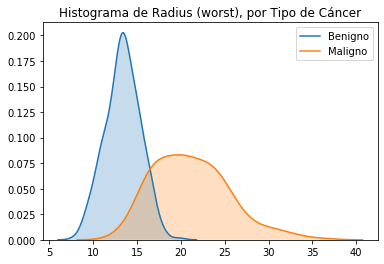

In [26]:
# Histogramas por cada tipo de cáncer
sns.kdeplot(data=cancer_b_data['Radius (worst)'], label="Benigno", shade=True)
sns.kdeplot(data=cancer_m_data['Radius (worst)'], label="Maligno", shade=True)

# Añade título
plt.title("Histograma de Radius (worst), por Tipo de Cáncer");

#### Parte B

Recientemente, un hospital comenzó a usar un algoritmo que puede diagnosticar tumores con alta precisión. Dado un tumor con un valor para `"Radius (worst)"` de 25, ¿cree que es más probable que el algoritmo clasifique el tumor como benigno o maligno?

**Solución**: es más probable que el algoritmo clasifique el tumor como maligno. Esto se debe a que la curva para los tumores malignos es mucho más alta que la curva para los tumores benignos alrededor de un valor de 25, y un algoritmo que obtiene una alta precisión es probable que tome decisiones basadas en este patrón en los datos.